In [1]:
import pandas as pd

path = '/Users/jinwon-kim/Desktop/kaggle_data/'

bank_df = pd.read_csv(path+'bank.csv', sep=',')

In [18]:
bank_df.tail(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
# 데이터의 행수(건수), 열수(항목수)를 확인해보자
print(bank_df.shape)

(45211, 17)


In [10]:
print(bank_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [11]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
# 결손값의 확인
print(bank_df.isnull().any(axis=1))

0        False
1        False
2        False
3        False
4        False
         ...  
45206    False
45207    False
45208    False
45209    False
45210    False
Length: 45211, dtype: bool


In [14]:
print(bank_df.isnull().any(axis=0))

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool


In [16]:
# 결손값의 개수 파악
print(bank_df.isnull().sum(axis=1))
print(bank_df.isnull().sum(axis=0))

0        0
1        0
2        0
3        0
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Length: 45211, dtype: int64
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [20]:
# 결손값의 개수가 많은 순서로 나열
print(bank_df.isnull().sum(axis=1).sort_values(ascending=False))

45210    0
15011    0
15075    0
15074    0
15073    0
        ..
30138    0
30137    0
30136    0
30135    0
0        0
Length: 45211, dtype: int64


In [17]:
# 통계량 계산
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [21]:
# 데이터형이 문자열(object)인 항목에 대해서 각종 통계값을 계산하시오
bank_df.describe(include=[object])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


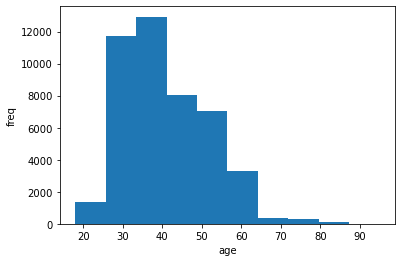

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(bank_df['age'])
plt.xlabel('age')
plt.ylabel('freq')
plt.show()

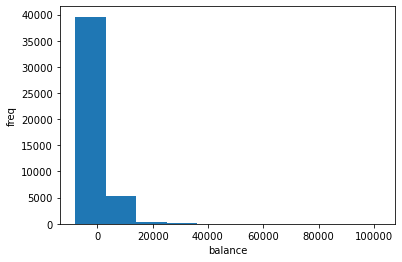

In [23]:
plt.hist(bank_df['balance'])
plt.xlabel('balance')
plt.ylabel('freq')
plt.show()

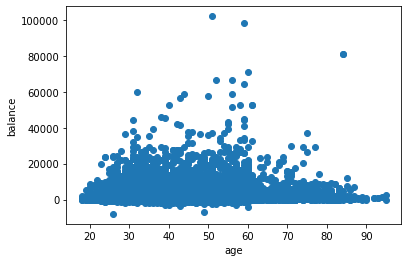

,age,balance
age,1.000000,0.097783
balance,0.097783,1.000000


In [24]:
plt.scatter(bank_df['age'], bank_df['balance'])
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

bank_df[['age','balance']].corr()

두 상관계수는 0.097이며 무관계에 가까운 상태이다. "두 개의 항목에 관련성이 없어 보인다"  
### 상관계수  
상관계수는 -1부터 1 사이으 ㅣ값을 취하며 절댓값이 크면 클수록 두 항목의 관련성이 강하고 절댓값이 작을수록 두 항목의 관련성은 약해집니다. 또, 산관에는 양의 상관과 음의 상관이 있습니다.  
양의 상관을 취하면 두 항목은 비례 관계에 있으며, 음의 상관을 취하면 두 항목은 반비례 관계에 있습니다.
### 공선성
변수(항목) 상호간에 강하게 상관해 발생하는 문제이다.
공선성이 일으키는 문제에는 모델 작성에 관련된 계산량의 증대, 모델의 성능 저하, 모델의 불안정화 등이 있다.  
이와 같은 문제를 방지하려면 데이터 준비 단계에서 상관이 강한 변수를 제외하면 된다.  
또 상관관계가 있어도 인과관계(원인과 결과)가 꼭 있다고 하기는 어렵다.

다음 두 개의 현상들은 상관관계나 인과관계 중 어느 쪽일까?
1. 키가 크면 체중이 증가한다.
2. 파출소의 수가 많은 지역일수록 범죄 건수가 많다.
3. 기온이 상승하면 맥주 판매가 늘어난다.

1 항목과 3 한목은 사상간에 상관관계가 있으며, 2 항목은 사상간에 인과관계가 있다.

In [25]:
print(bank_df['job'].value_counts(ascending=False, normalize=True))

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


In [27]:
job_label = bank_df['job'].value_counts(ascending = False, normalize = True).index

In [38]:
job_vals = bank_df['job'].value_counts(ascending = False, normalize = True).values

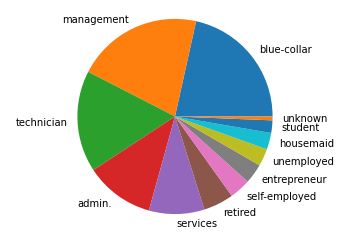

In [39]:
plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

In [43]:
bank_df['marital'].value_counts(ascending = False, normalize = True).index

Index(['married', 'single', 'divorced'], dtype='object')

In [44]:
y_label = bank_df['y'].value_counts(ascending=False, normalize=True).index
y_vals = bank_df['y'].value_counts(ascending=False, normalize=True).values

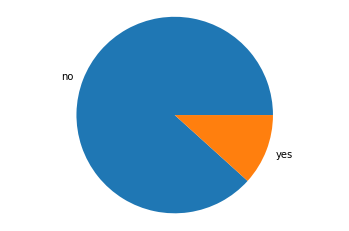

In [45]:
plt.pie(y_vals, labels=y_label)
plt.axis('equal')
plt.show()
# 데이터의 균형을 맞출 필요가 있어보임

In [94]:
# 목적변수 y에 대한 데이터 분포 확인
y_yes = bank_df[bank_df['y'] == 'yes']
y_no = bank_df[bank_df['y'] == 'no']

In [96]:
y_age = [y_yes['age'], y_no['age']]

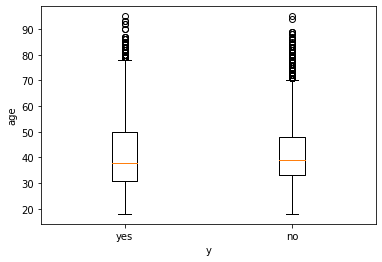

In [98]:
plt.boxplot(y_age)
plt.xlabel('y')
plt.ylabel('age')
ax = plt.gca()
plt.setp(ax, xticklabels = ['yes', 'no'])
plt.show()